# 今回は確率集中不等式で有名なHoeffidingの不等式を実装していきます

Hoeffidingの不等式は以下のようになります
X1, X2,  ..., Xnは独立の確率変数とし, 各X_iのとりうる範囲は[b,a]とし, 平均はμ, X = (X1 + X2 + ... + Xn)/n とすると, どんなε > 0で次の不等式が成り立ちます．
$$
P(|X - \mu| \geq \varepsilon) \leq 2\exp\left(-\frac{2n\varepsilon^2}{(b-a)^2}\right)
$$



**実験で本当にこの不等式が成り立つか確認してみます．**

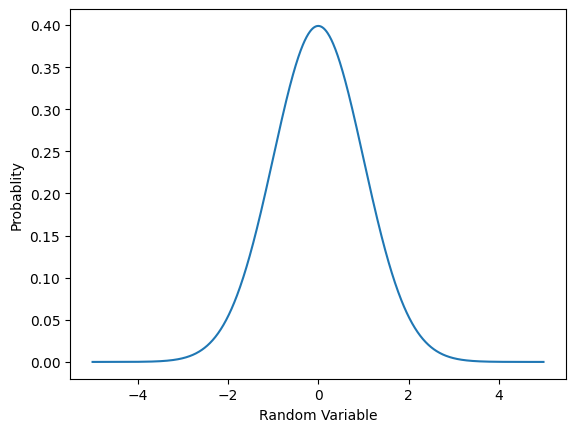

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
#確率変数のとりうる範囲
x = np.arange(-5,5,0.01)

#正規分布
y =norm.pdf(x,0,1)
plt.xlabel('Random Variable')
plt.ylabel('Probablity')
plt.plot(x,y)